In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

## IMDB data set
인터넷영화 데이터베이스<br/>
리뷰 : 5만개 <br/>
훈련데이터 : 25000개 (긍정 50%, 부정 50%)<br/>
테스트데이터 : 25000개 <br/>

feature에는 단어 데이터가 빈번하게 출현한 단어 순으로 10000개의 단어가 저장되었으며, 이 데이터를 분석한다.

In [3]:
train_data.shape ,train_labels.shape

((25000,), (25000,))

In [4]:
import pandas as pd

train_data_df = pd.DataFrame(train_data)
train_labels_df = pd.DataFrame(train_labels)

movie_df = pd.DataFrame(train_data_df)
movie_df.columns = ['train_data']
movie_df['train_labels'] = train_labels_df

In [5]:
movie_df

,train_data,train_labels
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0
...,...,...
24995,"[1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...",1
24996,"[1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...",0
24997,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...",0
24998,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...",1


In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   train_data    25000 non-null  object
 1   train_labels  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
movie_df.dtypes

train_data      object
train_labels     int64
dtype: object

In [8]:
movie_df.iloc[:,0]

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [9]:
movie_df.iloc[:,1]

0        1
1        0
2        0
3        1
4        0
        ..
24995    1
24996    0
24997    0
24998    1
24999    0
Name: train_labels, Length: 25000, dtype: int64

In [10]:
# dataframe 에 null값이 있는지 확인.
movie_df.isnull().sum()

train_data      0
train_labels    0
dtype: int64

In [11]:
# 전체 단어중에서 가장 적게쓰인단어 -> 가장 순위가 낮아야함. 즉, 수가 커야함
max( [max(i) for i in train_data])

9999

In [12]:
# 댓글의 단어(숫자로변환된) 하나씩 풀기
for i in train_data[1]:
    print(i)

1
194
1153
194
8255
78
228
5
6
1463
4369
5012
134
26
4
715
8
118
1634
14
394
20
13
119
954
189
102
5
207
110
3103
21
14
69
188
8
30
23
7
4
249
126
93
4
114
9
2300
1523
5
647
4
116
9
35
8163
4
229
9
340
1322
4
118
9
4
130
4901
19
4
1002
5
89
29
952
46
37
4
455
9
45
43
38
1543
1905
398
4
1649
26
6853
5
163
11
3215
2
4
1153
9
194
775
7
8255
2
349
2637
148
605
2
8003
15
123
125
68
2
6853
15
349
165
4362
98
5
4
228
9
43
2
1157
15
299
120
5
120
174
11
220
175
136
50
9
4373
228
8255
5
2
656
245
2350
5
4
9837
131
152
491
18
2
32
7464
1212
14
9
6
371
78
22
625
64
1382
9
8
168
145
23
4
1690
15
16
4
1355
5
28
6
52
154
462
33
89
78
285
16
145
95


In [13]:
# 숫자와 맵핑된 단어 찾기
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [14]:
# 딕셔너리의 키와 값 서로 바꾸기
word_dict = dict([(value, key) for (key,value) in word_index.items()])
word_dict

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [15]:
train_data[17]

[1,
 33,
 4,
 5673,
 7,
 4,
 2,
 194,
 2,
 3089,
 3438,
 11,
 4131,
 1237,
 2,
 2,
 5,
 4,
 522,
 2,
 2,
 13,
 8474,
 23,
 35,
 3077,
 9731,
 148,
 2,
 503,
 503,
 758,
 451,
 37,
 5535,
 4,
 123,
 103,
 153,
 7,
 6397,
 2,
 2,
 8021,
 141,
 17,
 2,
 2,
 2,
 2,
 2,
 13,
 197,
 36,
 71,
 112,
 2,
 5,
 301,
 38,
 2,
 2808,
 320,
 893,
 2,
 16,
 95,
 1376,
 83,
 4,
 3743,
 19,
 49,
 7197,
 46,
 12,
 69,
 2684,
 35,
 631,
 284,
 2,
 56,
 73,
 422,
 21,
 488,
 6239,
 69,
 1452,
 11,
 2853,
 17,
 6,
 430,
 5,
 4597,
 2,
 2,
 4,
 3769,
 2,
 4909,
 4,
 635,
 29,
 839,
 8,
 27,
 239,
 17,
 2,
 2,
 2,
 4,
 3212,
 1395,
 109,
 284,
 2,
 2,
 301,
 11,
 6,
 5125,
 664,
 2,
 2,
 4,
 2,
 15,
 29,
 16,
 3072,
 54,
 29,
 557,
 6239,
 69,
 5955,
 4,
 217,
 21,
 1283,
 57,
 1395,
 284,
 100,
 28,
 256,
 15,
 217,
 17,
 73,
 17,
 6239,
 849,
 10,
 10,
 2,
 16,
 4050,
 5,
 2,
 4236,
 123,
 8,
 2,
 2,
 82,
 270,
 11,
 7627,
 4,
 2,
 631,
 513,
 7,
 2,
 23,
 2019,
 69,
 77,
 2959,
 34,
 4,
 893,
 9147,
 2,
 

In [16]:
def convert_review(num):
    a = ""
    for i in train_data[num]:
        a = a + word_dict.get(i-3,'?') + " "
    return a

In [106]:
convert_review(17)

"? at the height of the ? big ? racism row in 2007 involving ? ? and the late ? ? i condemned on an internet forum those ? b b ' fans who praised the show after years of bashing ? ? sitcoms such as ? ? ? ? ? i thought they were being ? and said so ? ain't half hot ? was then thrown into the argument with some pointing out it had starred an english actor ? up well yes but michael bates had lived in india as a boy and spoke ? ? the show's ? overlook the reality he brought to his performance as ? ? ? the noted indian character actor ? ? said in a 1995 documentary ? ? the ? that he was upset when he heard bates had landed the role but added no indian actor could have played that role as well as bates indeed br br ? was perry and ? companion show to ? ? also set in wartime the ? english town of ? on sea had been replaced by the hot steamy ? of india in particularly a place called ? where an army concert party puts on shows for the troops among them ? ? george ? his first sitcom role since ?

In [17]:
word_dict = sorted(word_dict.items())[0:9999]

In [18]:
word_dict

[(1, 'the'),
 (2, 'and'),
 (3, 'a'),
 (4, 'of'),
 (5, 'to'),
 (6, 'is'),
 (7, 'br'),
 (8, 'in'),
 (9, 'it'),
 (10, 'i'),
 (11, 'this'),
 (12, 'that'),
 (13, 'was'),
 (14, 'as'),
 (15, 'for'),
 (16, 'with'),
 (17, 'movie'),
 (18, 'but'),
 (19, 'film'),
 (20, 'on'),
 (21, 'not'),
 (22, 'you'),
 (23, 'are'),
 (24, 'his'),
 (25, 'have'),
 (26, 'he'),
 (27, 'be'),
 (28, 'one'),
 (29, 'all'),
 (30, 'at'),
 (31, 'by'),
 (32, 'an'),
 (33, 'they'),
 (34, 'who'),
 (35, 'so'),
 (36, 'from'),
 (37, 'like'),
 (38, 'her'),
 (39, 'or'),
 (40, 'just'),
 (41, 'about'),
 (42, "it's"),
 (43, 'out'),
 (44, 'has'),
 (45, 'if'),
 (46, 'some'),
 (47, 'there'),
 (48, 'what'),
 (49, 'good'),
 (50, 'more'),
 (51, 'when'),
 (52, 'very'),
 (53, 'up'),
 (54, 'no'),
 (55, 'time'),
 (56, 'she'),
 (57, 'even'),
 (58, 'my'),
 (59, 'would'),
 (60, 'which'),
 (61, 'only'),
 (62, 'story'),
 (63, 'really'),
 (64, 'see'),
 (65, 'their'),
 (66, 'had'),
 (67, 'can'),
 (68, 'were'),
 (69, 'me'),
 (70, 'well'),
 (71, 'than'),


## 데이터 준비

In [32]:
import numpy as np

# 10000개의 열을 가지는 벡터를 생성하고, 해당 단어가 존재하면 1
def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequence(train_data).astype('float32')

# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequence(test_data).astype('float32')

## 딥러닝 모델

In [28]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
# 훈련데이터와 검증데이터 나누기
x_val = x_train[:10000].astype(float)
partial_x_train = x_train[10000:].astype(float)

y_val = train_labels[:10000].astype(float)
partial_y_train = train_labels[10000:].astype(float)

In [37]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5196 - accuracy: 0.7925 - val_loss: 0.4103 - val_accuracy: 0.8598
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3219 - accuracy: 0.9017 - val_loss: 0.3173 - val_accuracy: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2344 - accuracy: 0.9285 - val_loss: 0.2819 - val_accuracy: 0.8922
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1860 - accuracy: 0.9405 - val_loss: 0.2860 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1533 - accuracy: 0.9528 - val_loss: 0.2803 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1284 - accuracy: 0.9609 - val_loss: 0.2920 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1030 - accuracy: 0.9701 - val_loss: 0.3002 - val_accuracy: 0.8824
Epoch 8/20
30

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc)+1)

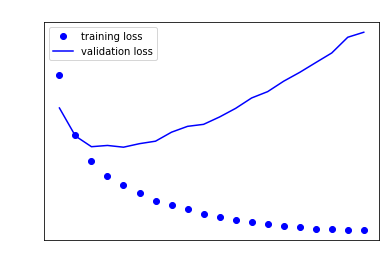

In [48]:
import matplotlib.pyplot as plt

# bo는 파란색 점을 의미
plt.plot(epochs,loss,'bo',label = 'training loss')

# b는 파란색 실선을 의미
plt.plot(epochs,val_loss,'b',label = 'validation loss')

plt.title('Training and Validation loss',color = 'white')
plt.xlabel('Epochs',color = 'white')
plt.ylabel('Loss',color = 'white')
plt.legend()
plt.tick_params(colors = 'white', color = 'white')

plt.show()

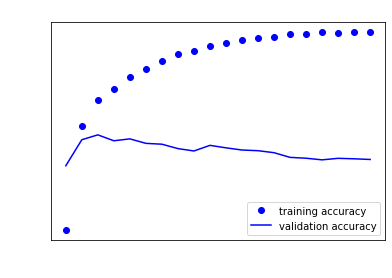

In [47]:
plt.plot(epochs,acc,'bo',label = 'training accuracy')
plt.plot(epochs,val_acc,'b',label = 'validation accuracy')
plt.title('Training and Validation accuracy',color = 'white')
plt.xlabel('Epochs',color = 'white')
plt.ylabel('Accuracy',color = 'white')
plt.legend()
plt.tick_params(colors = 'white', color = 'white')

In [52]:
# 학습된 모델을 삭제하고 새 모델을 생성한다.
del model

In [53]:
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
history = model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/4
30/30 [==============================] - 1s 25ms/step - loss: 0.5261 - accuracy: 0.7690 - val_loss: 0.3968 - val_accuracy: 0.8614
Epoch 2/4
30/30 [==============================] - 1s 18ms/step - loss: 0.3071 - accuracy: 0.9027 - val_loss: 0.3053 - val_accuracy: 0.8865
Epoch 3/4
30/30 [==============================] - 1s 18ms/step - loss: 0.2213 - accuracy: 0.9273 - val_loss: 0.2956 - val_accuracy: 0.8817
Epoch 4/4
30/30 [==============================] - 1s 18ms/step - loss: 0.1716 - accuracy: 0.9445 - val_loss: 0.2743 - val_accuracy: 0.8886


In [55]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc)+1)

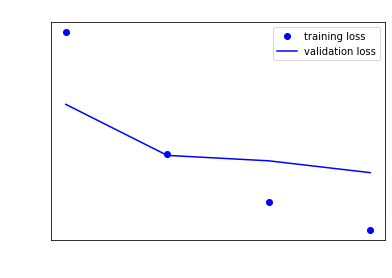

In [56]:
plt.plot(epochs,loss,'bo',label = 'training loss')
plt.plot(epochs,val_loss,'b',label = 'validation loss')
plt.title('Training and Validation loss',color = 'white')
plt.xlabel('Epochs',color = 'white')
plt.ylabel('Loss',color = 'white')
plt.legend()
plt.tick_params(colors = 'white', color = 'white')
plt.show()

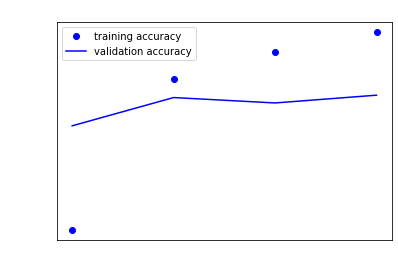

In [57]:
plt.plot(epochs,acc,'bo',label = 'training accuracy')
plt.plot(epochs,val_acc,'b',label = 'validation accuracy')
plt.title('Training and Validation accuracy',color = 'white')
plt.xlabel('Epochs',color = 'white')
plt.ylabel('Accuracy',color = 'white')
plt.legend()
plt.tick_params(colors = 'white', color = 'white')

In [58]:
model.predict(x_test)

array([[0.1913512 ],
       [0.99704605],
       [0.8448224 ],
       ...,
       [0.08682677],
       [0.11242241],
       [0.43869874]], dtype=float32)